# Author : Shashank Pal

## Task 1 : Prediction using Supervised ML

In this task, we will pedict the percentage of marks that a student is expected to score based upon the numbers of hours they studied. This is a simple linear regression task as it involves just two variables.

In [6]:
# Importing all libraries required in the task.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Step 1 : Reading data from online source

In [8]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
# Check if there any null value in the Dataset
data.isnull == True

False

## Step 2 : Data Visualisation

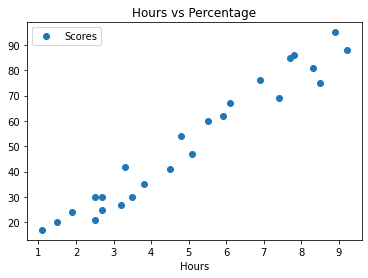

In [10]:
# Plotting the distribution of scores
data.plot(x="Hours", y="Scores", style="o")
plt.title('Hours vs Percentage')
plt.show()

## Step 3 : Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

## Step 4 : Algorithm Training

Splitting the data into training data-set and test data-set. Then, start training the algorithm.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

In [14]:
print("Training Done!!")


Training Done!!


## Step 5 : Plotting regression line

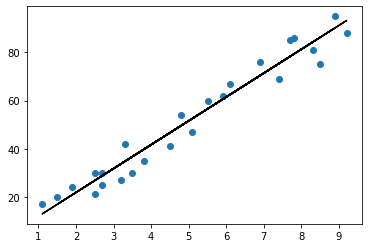

In [15]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter (x,y)
plt.plot (x, line, color = 'Black')
plt.show()

## Step 6 : Making Prediction

Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
### Testing data - In Hours
print(x_test)

### Predicting the scores
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Step : 7 Comparing Actual vs Predicted

In [17]:
### Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [18]:
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
### Estimating the Training Data and Test Data Score
print("Training score:", regressor.score(x_train, y_train))
print("Testing score:", regressor.score(x_test, y_test))


Training score: 0.9515510725211552
Testing score: 0.9454906892105356


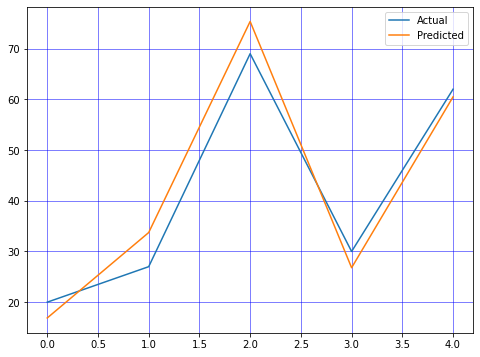

In [20]:
### Ploting the line graph to depict the diffrence between the actual and predicted value.
data.plot(kind='line', figsize=(8,6))
plt.grid(which='major', linewidth='0.5', color = 'black')
plt.grid(which='major', linewidth='0.5', color = 'blue')
plt.show()

In [21]:
### Testing your own data.
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print ("No. of Hours = {}".format(hours))
print ("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737538


## Step 8 : Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root mean squared Error: 4.6474476121003665
